## $T_e^*$ - dimensionless flow duration

(See also, Chadwick et al., 2019 - "Origin of a Preferential Avulsion Node on Lowland River Deltas")

\begin{equation}
T_e^* = \frac{T_{scour} q_s}{L_b H_c}
\end{equation}

<center> $q_s$ = unit sediment discharge


<ipython-input-4-3bbc60da6019>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rivers[13] = 'Experiment (Ganti et al., 2016)'
<ipython-input-4-3bbc60da6019>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te_star[13] = 0.36
<ipython-input-4-3bbc60da6019>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te_star_err[13] = 0


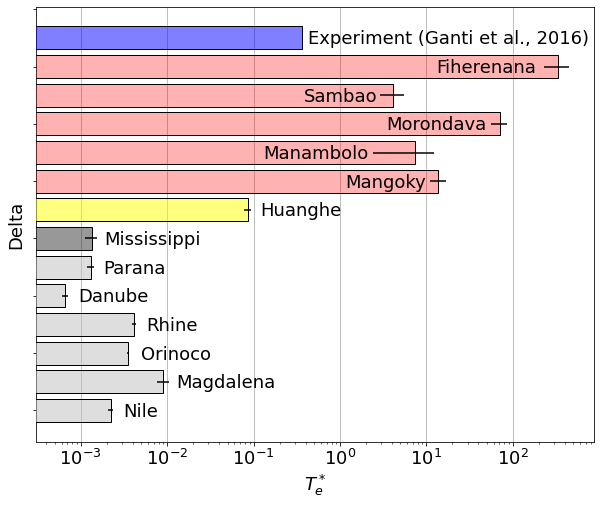

In [4]:
__author__ = "Sam Brooke"
__email__ = "sbrooke@ucsb.edu"

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(figsize=(10, 8))

# Load precalculated data from CSV
avulsion_db = pd.read_csv(os.path.join('./scour_data_output/l_scour_table_monthly_only.csv'))
avulsion_db.set_index('River')
avulsion_db = avulsion_db.drop(index=7).reset_index()
rivers = avulsion_db.River
rivers[13] = 'Experiment (Ganti et al., 2016)'

y_pos = np.arange(len(rivers))
te_star = avulsion_db['T_e*']
te_star_err = avulsion_db['T_e* std_dev']
te_star[13] = 0.36
te_star_err[13] = 0
ax.grid(zorder=0)
barlist = ax.barh(y_pos, te_star, align='center', log=True, zorder=3, edgecolor='black', xerr=te_star_err)
barlist[0].set_color('r')
barlist[0].set_edgecolor('black')

for i in range(6,8):
    barlist[i].set_facecolor((0.2, 0.2, 0.2, 0.5))
    
for i in range(0,6):
    barlist[i].set_facecolor((0.75, 0.75, 0.75, 0.5))

barlist[7].set_facecolor((1, 1, 0, 0.5))

for i in range(8,13):
    barlist[i].set_facecolor((1, 0, 0, 0.3))

barlist[13].set_facecolor((0, 0, 1, 0.5))

def autolabel(rects):
    for idx, rect in enumerate(barlist):
        if idx in range(8,13):
            if rivers[idx].capitalize() == 'Mangoky':
                x_value = rect.get_width()-(rect.get_width()/1.09)
            elif rivers[idx].capitalize() == 'Manambolo':
                x_value = rect.get_width()-(rect.get_width()/1.018)
            elif rivers[idx].capitalize() == 'Morondava':
                x_value = rect.get_width()-(rect.get_width()/1.05)
            elif rivers[idx].capitalize() == 'Sambao':
                x_value = rect.get_width()-(rect.get_width()/1.1)
            elif rivers[idx].capitalize() == 'Fiherenana':
                x_value = rect.get_width()-(rect.get_width()/1.04)
            
        elif idx == 13:
            x_value = rect.get_width()+(rect.get_width()*0.2)
        else:
            x_value = rect.get_width()+(rect.get_width()*0.4)
            
        y_value = rect.get_y()-0.21 + rect.get_height() / 2
        
        if rivers[idx] == 'mississippi_1':
            ax.text(x_value, y_value,
                    'Mississippi')            
        elif idx == 13:
            ax.text(x_value, y_value,
                    rivers[idx])
        else:
            ax.text(x_value, y_value,
                    rivers[idx].capitalize())

autolabel(barlist)

# ax.set_yticks(y_pos)
# ax.set_yticklabels(rivers)
ax.set_yticklabels([])
ax.set_xlabel('$T_e^*$')
ax.set_ylabel('Delta')
ax.set_xscale("log")
ax.yaxis.grid(False)
plt.show()
fig.savefig('figures/Te_star.pdf')
